In [1]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings (action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# 1. Load the cars dataset.
df = pd.read_csv(r"D:\Desktop\autos_small.csv")
df.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [3]:
df.isnull().any()

price                  False
name                   False
yearOfRegistration     False
monthOfRegistration    False
gearbox                 True
powerPS                False
model                   True
kilometer              False
fuelType                True
brand                  False
vehicleType             True
dtype: bool

In [4]:
df.isna().sum()

price                     0
name                      0
yearOfRegistration        0
monthOfRegistration       0
gearbox                 577
powerPS                   0
model                   567
kilometer                 0
fuelType                943
brand                     0
vehicleType            1050
dtype: int64

In [5]:
df.drop("name",axis=1,inplace=True)
df.drop("model",axis=1,inplace=True)
df.drop("fuelType",axis=1,inplace=True)
df.drop("brand",axis=1,inplace=True)
df.drop("vehicleType",axis=1,inplace=True)

In [6]:
df

,price,yearOfRegistration,monthOfRegistration,gearbox,powerPS,kilometer
0,400,1992,8,manuell,89,60000
1,3500,1996,0,manuell,150,125000
2,2200,1998,0,manuell,150,150000
3,4000,2006,7,manuell,0,150000
4,2600,2002,7,automatik,41,150000
...,...,...,...,...,...,...
9995,2650,2005,1,manuell,80,150000
9996,9600,2011,6,manuell,140,150000
9997,1500,1999,0,NaN,101,150000
9998,970,2002,10,manuell,58,150000


In [7]:
df.fillna(method='ffill', inplace=True)

In [21]:
df

,price,yearOfRegistration,monthOfRegistration,gearbox,powerPS,kilometer
0,400.0,1992,8,manuell,89,60000
1,3500.0,1996,0,manuell,150,125000
2,2200.0,1998,0,manuell,150,150000
3,4000.0,2006,7,manuell,0,150000
4,2600.0,2002,7,automatik,41,150000
...,...,...,...,...,...,...
9995,2650.0,2005,1,manuell,80,150000
9996,9600.0,2011,6,manuell,140,150000
9997,1500.0,1999,0,manuell,101,150000
9998,970.0,2002,10,manuell,58,150000


In [8]:
X = df . iloc[:, :1].values
y = df . iloc[:, -1].values
y

array([ 60000, 125000, 150000, ..., 150000, 150000,  60000], dtype=int64)

In [9]:
from sklearn. model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

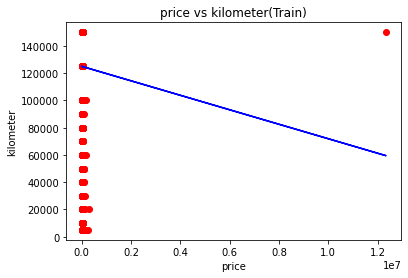

Text(0, 0.5, 'kilometer')

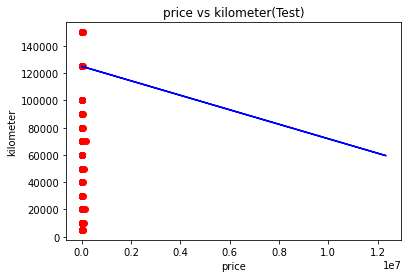

In [10]:
from sklearn. linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
#predict the test set results
Y_pred = lr.predict(X_test)

# Training set
plt . scatter(x_train, y_train, color = 'r')
plt. plot(x_train, lr.predict(x_train), color = 'b')
plt. title( 'price vs kilometer(Train)')
plt.xlabel( 'price')
plt. ylabel( 'kilometer')
plt . show()

# Test set
plt. scatter(X_test, y_test, color = 'r' )
plt. plot(x_train, lr. predict(x_train), color = 'b')
plt. title('price vs kilometer(Test)' )
plt . xlabel( 'price' )
plt. ylabel( 'kilometer')

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, Y_pred))

from sklearn. metrics import r2_score

r2 = r2_score(y_test, Y_pred)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(lr. coef_)-1)*(1-r2)

rmse, r2, adj_r2, lr. coef_, lr. intercept_

(40708.088507021144,
 0.0007060793729994908,
 0.0006061299910603557,
 array([-0.00531011]),
 125000.90432877326)

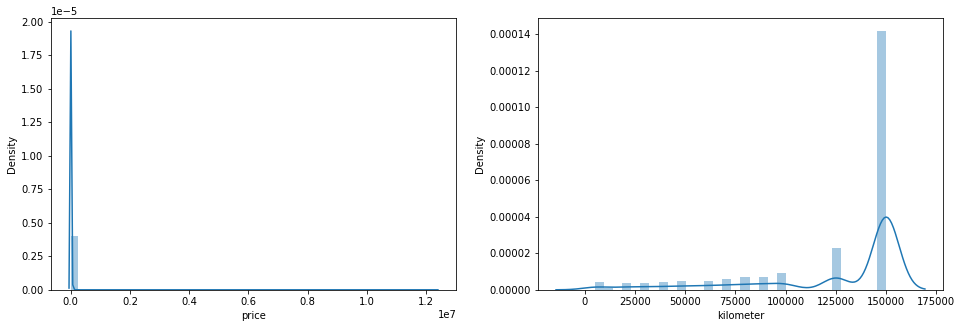

In [12]:
#Plot the Distribution plots for the features
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['price'])
plt.subplot(1,2,2)
sns.distplot(df['kilometer'])
plt.show()

In [13]:
#Finding the Boundary Values
print("Highest allowed",df['price'].mean() + 3*df['price'].std())
print("Lowest allowed",df['price'].mean() - 3*df['price'].std())

Highest allowed 378307.10906534287
Lowest allowed -364193.6998653429


In [14]:
#Finding the Outliers
df[(df['price'] > 378307.10) | (df['price'] <-364193.69)]

,price,yearOfRegistration,monthOfRegistration,gearbox,powerPS,kilometer
545,12345678,2001,0,manuell,101,150000


In [15]:
#Trimming of Outliers
new_df = df[(df['price'] < 378307.10) & (df['price'] > -364193.69)]
new_df

,price,yearOfRegistration,monthOfRegistration,gearbox,powerPS,kilometer
0,400,1992,8,manuell,89,60000
1,3500,1996,0,manuell,150,125000
2,2200,1998,0,manuell,150,150000
3,4000,2006,7,manuell,0,150000
4,2600,2002,7,automatik,41,150000
...,...,...,...,...,...,...
9995,2650,2005,1,manuell,80,150000
9996,9600,2011,6,manuell,140,150000
9997,1500,1999,0,manuell,101,150000
9998,970,2002,10,manuell,58,150000


In [16]:
#Capping on Outliers
upper_limit = df['price'].mean() + 3*df['price'].std()
lower_limit = df['price'].mean() - 3*df['price'].std()

In [17]:
#Now, apply the Capping
df['price'] = np.where(
    df['price']>upper_limit,
    upper_limit,
    np.where(
        df['price']<lower_limit,
        lower_limit,
        df['price']
    )
)

In [18]:
#Now see the statistics using “Describe” Function
df['price'].describe()

count     10000.000000
mean       5859.967511
std       10038.301403
min           0.000000
25%        1150.000000
50%        2999.000000
75%        7250.000000
max      378307.109065
Name: price, dtype: float64

<AxesSubplot:xlabel='kilometer'>

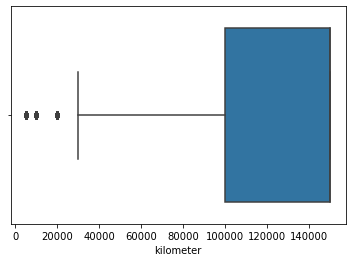

In [19]:
sns.boxplot(df['kilometer'])

In [20]:
#Imports
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor